In [25]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Importing Dataset**

In [13]:
dataset = load_boston()

X = dataset.data
y = dataset.target[:,np.newaxis]

print("Total samples in our dataset is: {}".format(X.shape[0]))

Total samples in our dataset is: 506


**Defining cost function:**

In [6]:
# (1/2) x Mean Squared Error (MSE)
def compute_cost(X, y, params):
    n_samples = len(y)
    h = X @ params
    return (1/(2*n_samples))*np.sum((h-y)**2)

**Gradient Descent:**

In [8]:
def gradient_descent(X, y, params, learning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters,1))

    for i in range(n_iters):
        params = params - (learning_rate/n_samples) * X.T @ (X @ params - y) 
        J_history[i] = compute_cost(X, y, params)

    return (J_history, params)

In [9]:
n_samples = len(y)

mu = np.mean(X, 0)
sigma = np.std(X, 0)

X = (X-mu) / sigma

X = np.hstack((np.ones((n_samples,1)),X))
n_features = np.size(X,1)
params = np.zeros((n_features,1))

Initial cost is:  296.0734584980237 

Optimal parameters are: 
 [[22.53279993]
 [-0.83980839]
 [ 0.92612237]
 [-0.17541988]
 [ 0.72676226]
 [-1.82369448]
 [ 2.78447498]
 [-0.05650494]
 [-2.96695543]
 [ 1.80785186]
 [-1.1802415 ]
 [-1.99990382]
 [ 0.85595908]
 [-3.69524414]] 

Final cost is:  [11.00713381]


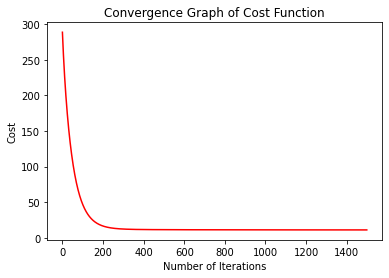

In [10]:
n_iters = 1500
learning_rate = 0.01

initial_cost = compute_cost(X, y, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(X, y, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()



---



---



**Class Implementation for Linear Regression**

In [47]:
class LinearRegression_():
    def __init__(self, X, y, alpha=0.03, n_iter=1500):

        # Learning Rate
        self.alpha = alpha
        # Number of epochs
        self.n_iter = n_iter
        # Number of samples
        self.n_samples = len(y)
        # Number of features
        self.n_features = np.size(X, 1)
        # Training sample
        self.X = np.hstack((np.ones(
            (self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        # Traning labels
        self.y = y[:, np.newaxis]
        # Weights or paramters of the model
        self.params = np.zeros((self.n_features + 1, 1))
        # Coef of the linear model (slope)
        self.coef_ = None
        # Intercept of the linear model
        self.intercept_ = None

    # Training the model on the training set.
    def fit(self):
        for i in range(self.n_iter):
            self.params = self.params - (self.alpha/self.n_samples) * \
            self.X.T @ (self.X @ self.params - self.y)

        self.intercept_ = self.params[0]
        self.coef_ = self.params[1:]

        return self

    # R2 score
    def score(self, X=None, y=None):

        if X is None:
            X = self.X
        else:
            n_samples = np.size(X, 0)
            X = np.hstack((np.ones((n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))

        if y is None:
            y = self.y
        else:
            y = y[:, np.newaxis]

        y_pred = X @ self.params
        score = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())

        return score

    # Make prediction on unseen data
    def predict(self, X):
        n_samples = np.size(X, 0)
        y = np.hstack((np.ones((n_samples, 1)), (X-np.mean(X, 0)) \
                            / np.std(X, 0))) @ self.params
        return y

    #  get weights of the linear model
    def get_params(self):
        return self.params

In [48]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

dataset = load_boston()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=42)

our_regressor = LinearRegression_(X_train, y_train).fit()
sklearn_regressor = LinearRegression().fit(X_train, y_train)

our_train_accuracy = our_regressor.score()
sklearn_train_accuracy = sklearn_regressor.score(X_train, y_train)

our_test_accuracy = our_regressor.score(X_test, y_test)
sklearn_test_accuracy = sklearn_regressor.score(X_test, y_test)

pd.DataFrame([[our_train_accuracy, sklearn_train_accuracy],
              [our_test_accuracy, sklearn_test_accuracy]],
             ['Training Accuracy', 'Test Accuracy'],    
             ['Our Implementation', 'Sklearn\'s Implementation'])

,Our Implementation,Sklearn's Implementation
Training Accuracy,0.743482,0.743500
Test Accuracy,0.675347,0.711226
